In [173]:
import pandas as pd

In [174]:
dataFrame=pd.read_csv('train.csv')

In [175]:
dataFrame.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [176]:
dataFrame[dataFrame.isnull().any(axis=1)==True].shape

(1460, 81)

In [177]:
dataFrame[dataFrame['Alley'].isnull()==False].shape

(91, 81)

In [178]:
dataFrame['Alley'].describe()

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

In [179]:
dataFrame['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

## 1. To indicate the Null values present in which categorical columns

In [180]:
dataFrame['Alley']=dataFrame['Alley'].fillna('Missing')

In [181]:
dataFrame.columns[
    (dataFrame.dtypes == 'object') & (dataFrame.isnull().any())
]


Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

### 2. IMPUTATION OF NULL VALUES ONE BY ONE

#### All the basment related attributes being missing can be interpreted as the basment wasnt available in that house so can be imputed as missing

## 2.1. Imputation of basement related columns

In [182]:
bsmt_cat_cols=dataFrame.columns[
 (dataFrame.dtypes=='object') & (dataFrame.columns.str.contains('Bsmt'))
]

In [183]:
dataFrame[bsmt_cat_cols]=dataFrame[bsmt_cat_cols].fillna('Missing')

## 2.2. Imputation of Garage related Columns

In [184]:
garage_cat_cols=dataFrame.columns[
(dataFrame.dtypes=='object') & (dataFrame.columns.str.contains('Garage'))
]

In [185]:
dataFrame[garage_cat_cols]=dataFrame[garage_cat_cols].fillna('No Garage' )

## 2.3. Imputation of Electrical column

In [186]:
dataFrame['Electrical']=dataFrame['Electrical'].fillna(dataFrame['Electrical'].mode()[0] )

## 2.4. Imputation of MiscFeature

In [187]:
dataFrame['MiscFeature']=dataFrame['MiscFeature'].fillna('Not applicable')

## 2.5. Imputation of Fence

In [188]:
dataFrame['Fence']=dataFrame['Fence'].fillna('No fence')

## 2.6. Imputation of PoolQC

In [189]:
dataFrame.isnull().sum()['PoolQC']


np.int64(1453)

In [190]:
import numpy as np

dataFrame['PoolQC'] = dataFrame['PoolQC'].replace(
    ['NA', 'N/A', 'None', '', 'nan'], np.nan
)

dataFrame['PoolQC']=dataFrame['PoolQC'].fillna('No Pool')

## 2.7. Imputation of MasVnrType 

In [191]:
dataFrame['MasVnrType']=dataFrame['MasVnrType'].fillna('Not Available')

## 2.8. Imputation of Fireplace Quality

In [192]:
dataFrame['FireplaceQu']=dataFrame['FireplaceQu'].fillna('No Fireplace')

In [193]:
dataFrame.columns[
    (dataFrame.dtypes == 'object') & (dataFrame.isnull().any())
]

Index([], dtype='object')

# 3. IDENTIFYING THE NUMERICAL COLUMNS WITH NULL VALUES

In [194]:
dataFrame.columns[
    (dataFrame.dtypes == 'float64') & (dataFrame.isnull().any())
]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

## 3.1. MasVnrArea

In [195]:
dataFrame[(dataFrame['MasVnrArea'].isnull()==True) & (dataFrame['MasVnrType']=='Not Available')]['MasVnrArea']

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

#### MasVnrArea is null in those columns where MasVnrType is not available

In [196]:
dataFrame['MasVnrArea']=dataFrame['MasVnrArea'].fillna(0)

## 3.2. GARAGEYRBLT

#### GaragyrBlt is the year in which garage was built

In [197]:
dataFrame['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [198]:
dataFrame[
    (dataFrame['GarageYrBlt'].isna()) &
    (dataFrame['GarageType'] != 'No Garage')
]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [199]:
dataFrame['GarageYrBlt']=dataFrame['GarageYrBlt'].fillna(0)

# 3.3 lotFrontage

In [200]:
dataFrame['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [201]:
dataFrame.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,No Pool,No fence,Not applicable,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,No Pool,No fence,Not applicable,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,No Pool,No fence,Not applicable,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,No Pool,No fence,Not applicable,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,No Pool,No fence,Not applicable,0,12,2008,WD,Normal,250000


In [202]:
dataFrame['LotFrontage'] = dataFrame['LotFrontage'].fillna(
    dataFrame['Neighborhood'].map(
        dataFrame.groupby('Neighborhood')['LotFrontage'].median()
    )
)


In [203]:
dataFrame.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

#### **Since the objective of this project is to implement linear, ridge, and lasso regression using gradient descent from scratch, EDA was limited to checks necessary for model stability and validity.*

# 4. Sale price transformation (Target Variable)

In [204]:
dataFrame['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: >

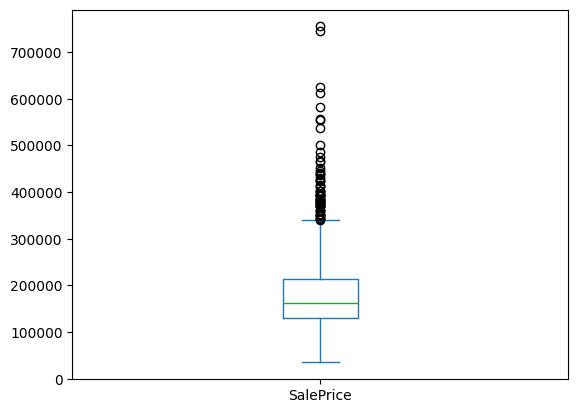

In [205]:
dataFrame['SalePrice'].plot(kind='box')

In [206]:
dataFrame['SalePrice']=np.log1p(dataFrame['SalePrice'])

In [207]:
dataFrame['SalePrice'].describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

## lot area transformation

In [208]:
dataFrame['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [209]:
dataFrame['LotArea_log'] = np.log(dataFrame['LotArea'])

<Axes: ylabel='Density'>

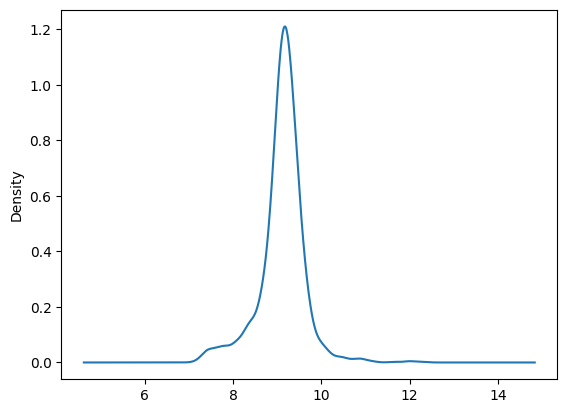

In [210]:
dataFrame['LotArea_log'].plot(kind='kde')

# 5. checking the skewness of the numerical columns

In [211]:

numeric_df = dataFrame.select_dtypes(include=['int64', 'float64'])

skewness = numeric_df.skew()


In [212]:
print(skewness)

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.212959
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -3.869501
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [213]:
moderate_right_skewed = [
    'MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1',
    'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
    'WoodDeckSF', 'OpenPorchSF', 'SalePrice'
]

dataFrame[moderate_right_skewed] = dataFrame[moderate_right_skewed].apply(np.log1p)


In [214]:
extreme_right_skewed=[
    'BsmtFinSF2',
    'LowQualFinSF',
    'BsmtHalfBath',
    'KitchenAbvGr',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal'
]

In [215]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
dataFrame[extreme_right_skewed]=pt.fit_transform(dataFrame[extreme_right_skewed])

### *For extreme left skewed we first reflect then use yeo johnson technique to transform*

In [216]:
extreme_left_skewed=['LotArea' , 'TotalBsmtSF']

In [217]:
dataFrame['LotArea']=dataFrame['LotArea'].max()+1-dataFrame['LotArea']

In [218]:
dataFrame['TotalBsmtSF']=dataFrame['TotalBsmtSF'].max()+1-dataFrame['LotArea']

In [219]:
dataFrame[extreme_left_skewed]=pt.fit_transform(dataFrame[extreme_left_skewed])

# 6. Encoding of categorical columns

In [220]:
categorical_cols=[]
for cols in dataFrame.columns: 
    if dataFrame[cols].dtype=='object':
        categorical_cols.append(cols)

In [221]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = ohe.fit_transform(dataFrame[categorical_cols])

encoded_df = pd.DataFrame(
    encoded,
    columns=ohe.get_feature_names_out(categorical_cols),
    index=dataFrame.index
)

dataFrame = dataFrame.drop(columns=categorical_cols)
dataFrame = pd.concat([dataFrame, encoded_df], axis=1)



# 7. Scaling of numerical features

In [222]:
numerical_cols = []
for cols in dataFrame.columns:
    if (dataFrame[cols].dtype in ['int64', 'float64']) and cols != 'SalePrice':
        numerical_cols.append(cols)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(dataFrame[numerical_cols])

scaled_df = pd.DataFrame(
    scaled,
    columns=numerical_cols,
    index=dataFrame.index
)

dataFrame = dataFrame.drop(columns=numerical_cols)
dataFrame = pd.concat([dataFrame, scaled_df], axis=1)


# 8. Feature reduction and Train Test Split

A reduced-dimension DataFrame is generally preferred for **Linear Regression** and **Ridge Regression**, as these models are sensitive to high dimensionality, which can negatively impact their performance.  

In contrast, for **Lasso Regression**, it is often preferable to use the complete DataFrame. This allows the model to demonstrate its inherent ability for **feature selection** and **dimensionality reduction** through coefficient shrinkage.  

However, it is important to note that an excessively high number of features can still adversely affect the performance of **Linear** and **Ridge Regression** models.
 

In [223]:
from sklearn.model_selection import train_test_split

In [140]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor  # for regression
from sklearn.ensemble import RandomForestClassifier  # if classification
from sklearn.model_selection import train_test_split

# Assume 'y' is your target column
X = dataFrame.drop(columns=['SalePrice'])
y = dataFrame['SalePrice']

# Train a Random Forest to measure feature importance
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
importance_threshold = 0.01  # keep features with importance > 0.01
important_features = X.columns[importances > importance_threshold]

# Keep only important features in your dataframe
dataFrame = dataFrame[important_features.tolist() + ['SalePrice']]

print(f"Kept features: {important_features.tolist()}")


Kept features: ['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']


In [224]:
x = dataFrame.drop(columns='SalePrice')
y = dataFrame['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


# Custom Linear Regression

In [142]:
class custom_LR:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.weights = 0
        self.intercept = 1
        self.iterations = iterations
        self.loss_history = []  #storing MSE per iteration

    def predict(self, x):
        y_pred = np.dot(x, self.weights) + self.intercept
        return y_pred

    def fit(self, x, y):
        self.training(x, y)

    def training(self, x, y):
        n, features = x.shape

        if isinstance(self.weights, int):
            self.weights = np.zeros(features)

        for i in range(self.iterations):
            y_pred = self.predict(x)

            gradient_wrtb = -2/n * np.sum(y - y_pred)
            gradient_wrtm = -2/n * np.dot(x.T, (y - y_pred))

            self.weights = self.weights - self.learning_rate * gradient_wrtm
            self.intercept = self.intercept - self.learning_rate * gradient_wrtb

            # ---- to track loss ----
            mse = np.mean((y - y_pred)**2)
            self.loss_history.append(mse)
            if i % 1000 == 0:  
                print(f"Iteration {i}, MSE: {mse}")


In [143]:
model = custom_LR(learning_rate=0.05, iterations=50000)
model.training(x_train, y_train)
print(model.weights, model.intercept)


Iteration 0, MSE: 2.455935921259676
Iteration 1000, MSE: 0.00012945291742773437
Iteration 2000, MSE: 0.0001294529174268129
Iteration 3000, MSE: 0.0001294529174268129
Iteration 4000, MSE: 0.00012945291742681294
Iteration 5000, MSE: 0.00012945291742681294
Iteration 6000, MSE: 0.00012945291742681294
Iteration 7000, MSE: 0.00012945291742681294
Iteration 8000, MSE: 0.00012945291742681294
Iteration 9000, MSE: 0.00012945291742681294
Iteration 10000, MSE: 0.00012945291742681294
Iteration 11000, MSE: 0.00012945291742681294
Iteration 12000, MSE: 0.00012945291742681294
Iteration 13000, MSE: 0.00012945291742681294
Iteration 14000, MSE: 0.00012945291742681294
Iteration 15000, MSE: 0.00012945291742681294
Iteration 16000, MSE: 0.00012945291742681294
Iteration 17000, MSE: 0.00012945291742681294
Iteration 18000, MSE: 0.00012945291742681294
Iteration 19000, MSE: 0.00012945291742681294
Iteration 20000, MSE: 0.00012945291742681294
Iteration 21000, MSE: 0.00012945291742681294
Iteration 22000, MSE: 0.000129

## Scikit Learn Linear Regression

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
lr=LinearRegression()

In [146]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [147]:
print(lr.coef_, lr.intercept_)

[0.00933543 0.0049829  0.00795234 0.00333465 0.00382905 0.01074157
 0.00423898 0.00042167] 2.566273455813201


## Comparing mean squared errors of both

In [148]:
y_pred_sk=lr.predict(x_test)

In [149]:
y_pred_custom=model.predict(x_test)

In [150]:
from sklearn.metrics import mean_squared_error
mse_custom=mean_squared_error(y_test , y_pred_custom)
mse_sk=mean_squared_error(y_test , y_pred_sk)

In [151]:
mse = np.mean((y_test - y_pred_custom)**2)
print(mse)

0.00013652581474047384


In [152]:
print(mse_sk)

0.00013652581474047243


## Ridge Regression 

In [153]:
import numpy as np
class CustomRidge:
    def __init__(self, learning_rate, iterations, lamda):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lamda = lamda
        self.weights = None
        self.intercept = 0.0

    def predict(self, X):
        return np.dot(X, self.weights) + self.intercept

    def train(self, X, y):
        n, features = X.shape
        self.weights = np.zeros(features)

        for i in range(self.iterations):
            y_pred = self.predict(X)

            dw = (2/n) * np.dot(X.T, (y_pred - y)) + 2 * self.lamda * self.weights
            db = (2/n) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.intercept -= self.learning_rate * db

            if i % 100 == 0:
                mse = np.mean((y - y_pred) ** 2)
                print(i, "MSE:", mse)

    

In [154]:
model_ridge=CustomRidge(0.01 , 3000 , 0.01)
model_ridge.train(x_train , y_train)
predictions_custom=model_ridge.predict(x_test)

0 MSE: 6.589648702072817
100 MSE: 0.1165168410976712
200 MSE: 0.00223428917772623
300 MSE: 0.00017442916796998203
400 MSE: 0.00013297336697816968
500 MSE: 0.0001308218126883084
600 MSE: 0.00013018547073883103
700 MSE: 0.00012987367773561822
800 MSE: 0.00012970424427951552
900 MSE: 0.000129608293003719
1000 MSE: 0.00012955301824230754
1100 MSE: 0.0001295210874201684
1200 MSE: 0.00012950279350402516
1300 MSE: 0.00012949251624153442
1400 MSE: 0.00012948694197246682
1500 MSE: 0.00012948410058517734
1600 MSE: 0.00012948281909072652
1700 MSE: 0.00012948240200727075
1800 MSE: 0.00012948244091054976
1900 MSE: 0.00012948269975967655
2000 MSE: 0.0001294830455127017
2100 MSE: 0.0001294834061095521
2200 MSE: 0.0001294837450871425
2300 MSE: 0.00012948404632341976
2400 MSE: 0.00012948430494593287
2500 MSE: 0.0001294845219812643
2600 MSE: 0.00012948470126292232
2700 MSE: 0.00012948484769228672
2800 MSE: 0.0001294849663013193
2900 MSE: 0.0001294850617829907


# Sklearn Ridge Regularizations

In [155]:
from sklearn.linear_model import Ridge

In [156]:
from sklearn.linear_model import Ridge

sklearn_ridge = Ridge(alpha=0.01, max_iter=3000)
sklearn_ridge.fit(x_train , y_train)
predictions_sk=sklearn_ridge.predict(x_test)


In [157]:
mse_custom=mean_squared_error(y_test , predictions_custom)
print(mse_custom)
mse_sklearn=mean_squared_error(y_test , predictions_sk)
print(mse_sklearn)

0.0001368886190112242
0.00013652608407194847


## LASSO REGRESSION

In [225]:
import numpy as np

class CustomLasso:
    def __init__(self, learning_rate, iterations, lamda):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.lamda = lamda
        self.weights = None
        self.intercept = 0

    def predict(self, x):
        y_pred = np.dot(x, self.weights) + self.intercept
        return y_pred

    def training(self, x, y):
        n, features = x.shape
        self.weights = np.zeros(features)   # initialize once

        for i in range(self.iterations):
            y_pred = self.predict(x)

            error = np.mean((y - y_pred) ** 2)
            # if i % 100 == 0:
            #     print(i, "MSE:", error)

            dw = (-2/n) * (x.T @ (y - y_pred)) + self.lamda * np.sign(self.weights)
            db = (2/n) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.intercept -= self.learning_rate * db


In [226]:
LassoModel=CustomLasso(0.01 , 1000 , 0.01)
LassoModel.training(x_train , y_train)

# Sklearn Lasso Regularization

In [227]:
from sklearn.linear_model import Lasso

In [228]:
lasso=Lasso()

In [229]:
lasso.fit(x_train , y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [230]:
y_pred=lasso.predict(x_test)

In [231]:
y_pred_custom=LassoModel.predict(x_test)

In [232]:
from sklearn.metrics import mean_squared_error
MSE_SK=mean_squared_error(y_test , y_pred)
MSE_CUSTOM=mean_squared_error(y_test , y_pred_custom)

In [233]:
print("SK" , MSE_SK)
print("CUSTOM:" , MSE_CUSTOM)

SK 0.0011104726126118288
CUSTOM: 0.00024246403231477546


## Visualizations

In [234]:
lambdas = np.logspace(-4, 1, 15)

coef_path = []   

for lam in lambdas:
    model = CustomLasso(learning_rate=0.01, iterations=1000, lamda=lam)
    model.training(x_train, y_train)
    coef_path.append(model.weights)


coef_path = np.array(coef_path)   # shape: (num_lambdas, num_features)



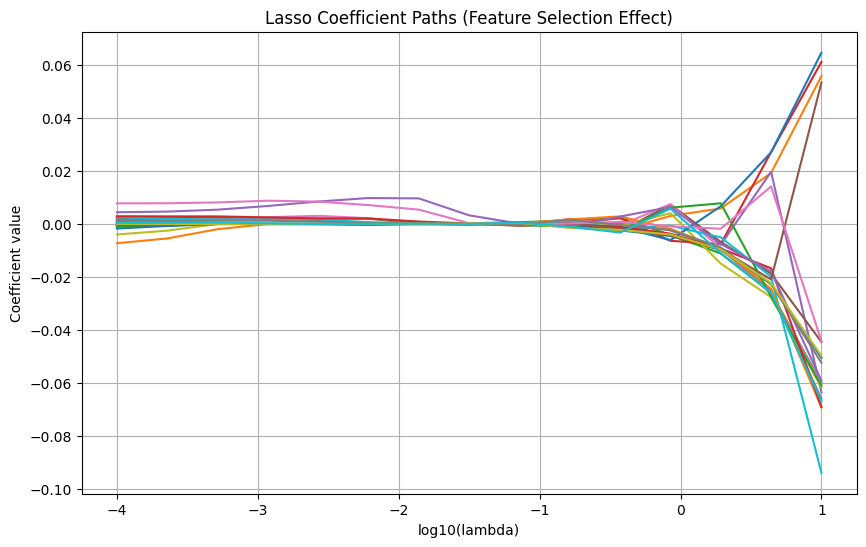

In [235]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for i in range(min(20, coef_path.shape[1])):
    plt.plot(np.log10(lambdas), coef_path[:, i])

plt.xlabel("log10(lambda)")
plt.ylabel("Coefficient value")
plt.title("Lasso Coefficient Paths (Feature Selection Effect)")
plt.grid(True)
plt.show()



In [169]:
lambdas = np.logspace(-4, 1, 15)
coef_path_ridge = []

for lam in lambdas:
    model = CustomRidge(learning_rate=0.01, iterations=1000, lamda=lam)
    model.train(x_train, y_train)
    coef_path_ridge.append(model.weights)

coef_path_ridge = np.array(coef_path_ridge)


0 MSE: 6.589648702072817
100 MSE: 0.1165260625356177
200 MSE: 0.0022366076785628893
300 MSE: 0.00017506207357633093
400 MSE: 0.00013330279268358806
500 MSE: 0.00013104598949434244
600 MSE: 0.00013034726912188488
700 MSE: 0.00012999011489280194
800 MSE: 0.00012978580960526804
900 MSE: 0.00012966277504102117
0 MSE: 6.589648702072817
100 MSE: 0.11652594225473326
200 MSE: 0.002236576894550782
300 MSE: 0.0001750532530650879
400 MSE: 0.0001332978936703847
500 MSE: 0.00013104243414030058
600 MSE: 0.00013034451525614234
700 MSE: 0.00012998795569705372
800 MSE: 0.0001297841190851979
900 MSE: 0.00012966145811453032
0 MSE: 6.589648702072817
100 MSE: 0.1165256686553986
200 MSE: 0.002236506924435556
300 MSE: 0.00017503324533001144
400 MSE: 0.00013328681018758023
500 MSE: 0.00013103441042548841
600 MSE: 0.00013033831632852468
700 MSE: 0.00012998310952824942
800 MSE: 0.000129780337898485
900 MSE: 0.00012965852487455492
0 MSE: 6.589648702072817
100 MSE: 0.11652504671728245
200 MSE: 0.00223634814617977

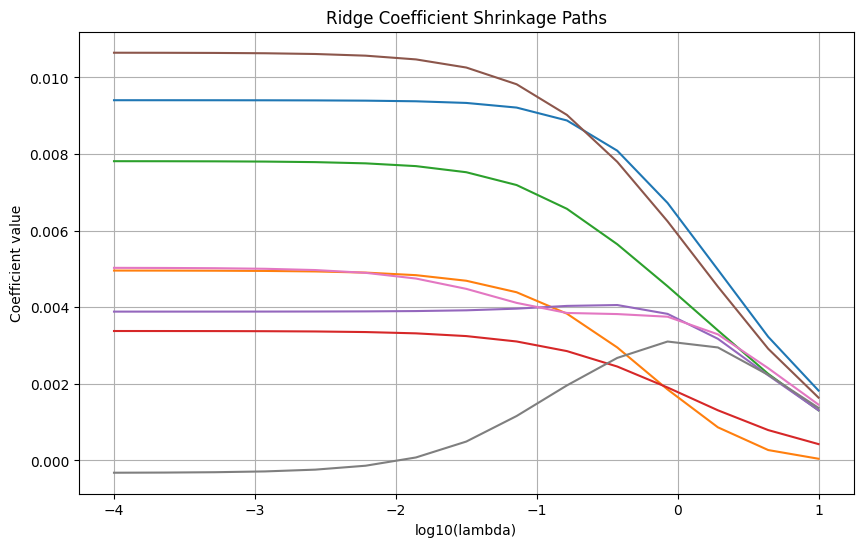

In [170]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for i in range(min(20, coef_path_ridge.shape[1])):
    plt.plot(np.log10(lambdas), coef_path_ridge[:, i])

plt.xlabel("log10(lambda)")
plt.ylabel("Coefficient value")
plt.title("Ridge Coefficient Shrinkage Paths")
plt.grid(True)
plt.show()

In [171]:
model = custom_LR(learning_rate=0.01, iterations=5000)
model.fit(x_train, y_train)


Iteration 0, MSE: 2.455935921259676
Iteration 1000, MSE: 0.00012949113166394282
Iteration 2000, MSE: 0.00012945338906728893
Iteration 3000, MSE: 0.0001294529235117439
Iteration 4000, MSE: 0.00012945291750534205


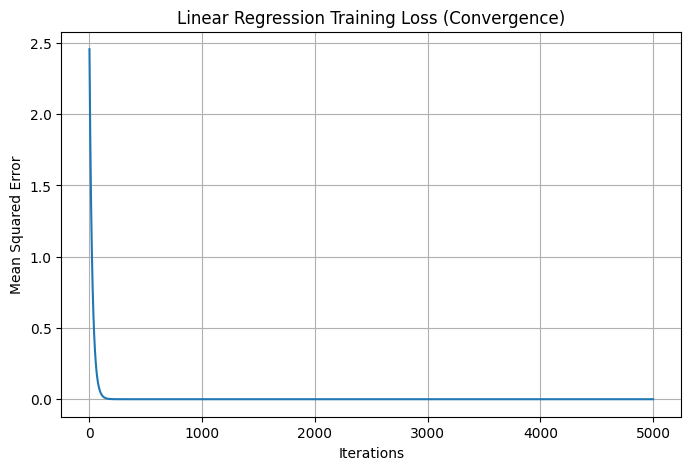

In [172]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(model.loss_history)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Linear Regression Training Loss (Convergence)")
plt.grid(True)
plt.show()
